In [2]:
#importing all the libraries in required in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#reading data from link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported!!")

s_data.head(25)

Data imported!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


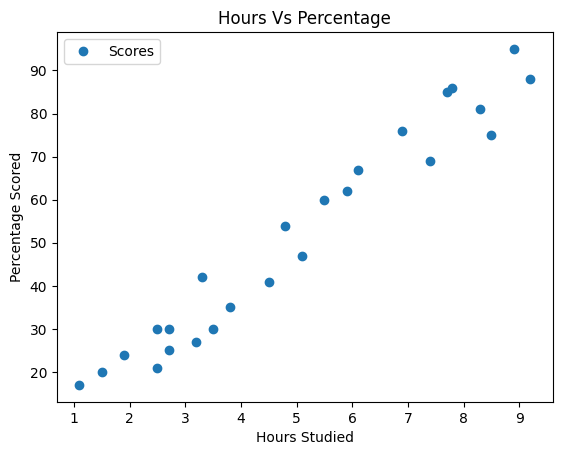

In [36]:
#plotting the distribution
s_data.plot(x='Hours', y='Scores',style = 'o')
plt.title('Hours Vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()



In [8]:
#Preparing the data
x = s_data.iloc[:,:-1]
y = s_data.iloc[:, 1]

In [9]:
#from scikit learn train_test_split() method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Done Right!!")

Training Done Right!!


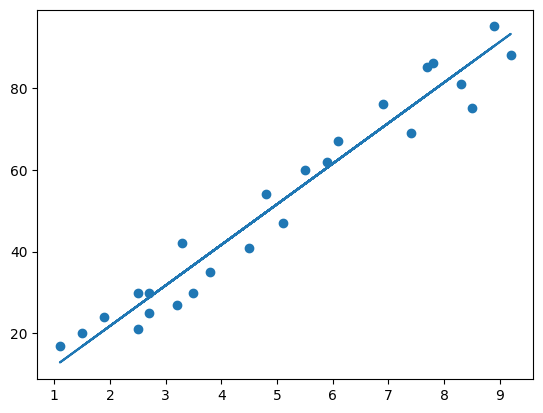

In [11]:
#plotting regression line
line = regressor.coef_*x+regressor.intercept_

#plotting the test data
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

Making Predictions

---



In [15]:
print(x_test)
y_pred = regressor.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
#comparing the actual and the predicted data
df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [42]:
#testing with our own data
Hours= np.array(9.25)
Hours = Hours.reshape(-1,1)
own_pred = regressor.predict(Hours)
print("No of hours= {}".format(Hours))
print("Scores predicted = {}".format(own_pred[0]))

No of hours= [[9.25]]
Scores predicted = 93.69173248737539


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
#evaluating
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
